In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from toygrad import MLP, Layer, Sigmoid, SoftMax, ReLU, TanH, Linear, SquaredError, BinaryCrossEntropy, AbsoluteError, CategoricalCrossEntropy
from plot import plot_metric, plot_categorical_decisions, plot_regression_decisions, plot_network

np.random.seed(2137)
plt.rcParams["figure.figsize"] = (15,10)

CLF = "data/classification"
REG = "data/regression"
DATASET_SIZES = [1000]#, 500, 1000, 10_000]

def one_hot(y):
    y = y.astype(int) - 1
    if (y.max() == 1):
        # This means this is a binary class - we can use a single variable
        return np.reshape(y, (-1, 1))
    encoded = np.zeros((y.size, y.max()+1))
    encoded[np.arange(y.size),y] = 1
    return encoded

def read_data(path, categorical=False, normalize_inputs=False):
    def normalize(vector):
        return (vector - vector.min()) / (np.ptp(vector))
    assert not (categorical and normalize_inputs), "Cannot normalize categorical data"
    """Read and shuffle the dataset"""
    data = np.genfromtxt(path, delimiter=',')[1:]
    np.random.shuffle(data)
    X = data[:, :-1]
    Y = one_hot(data[:, -1]) if categorical else data[:, -1].reshape(-1, 1)
    if normalize_inputs:
        X, Y = normalize(X), normalize(Y)    
    return X, Y

# Classification

### Simple dataset

Simple dataset (train/test sample size 1000)
Epoch   10 - train loss   0.68 (std:  0.13) - test loss   0.67 (std:  0.14)
Epoch   20 - train loss   0.37 (std:  0.20) - test loss   0.34 (std:  0.21)
Epoch   30 - train loss   0.13 (std:  0.17) - test loss   0.13 (std:  0.18)
Epoch   40 - train loss   0.08 (std:  0.14) - test loss   0.08 (std:  0.16)
Epoch   50 - train loss   0.06 (std:  0.12) - test loss   0.06 (std:  0.14)


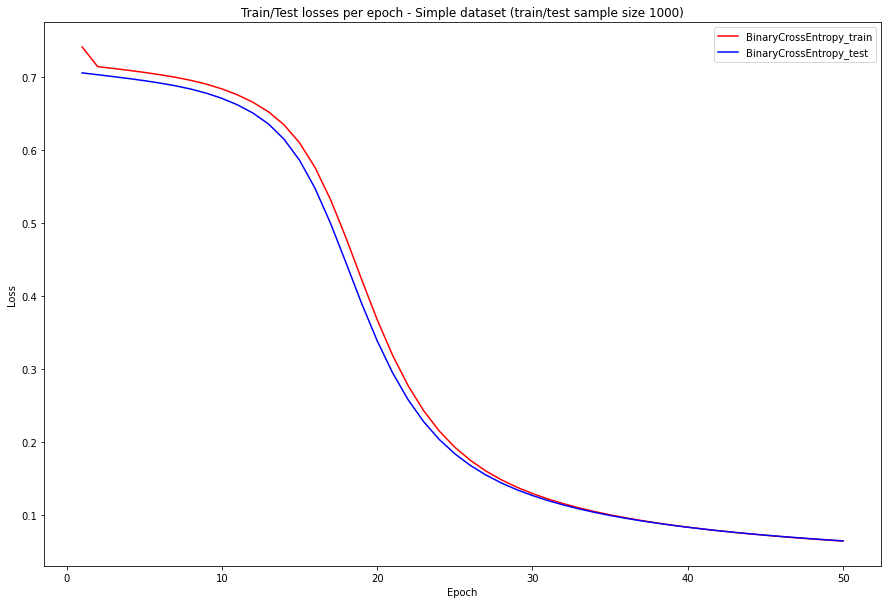

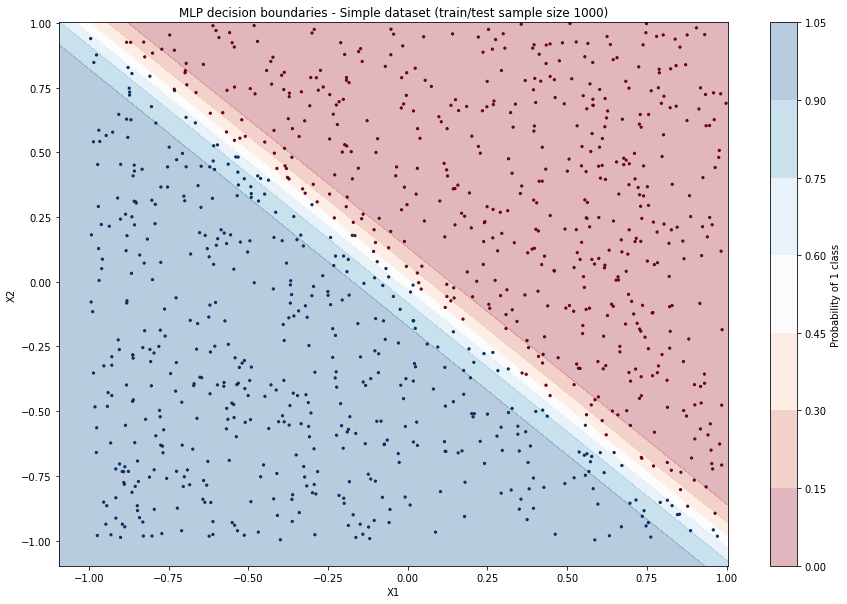

In [2]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{CLF}/data.simple.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.simple.test.{size}.csv", categorical=True)
    
    layers = [
        Layer(in_size=2, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=1, activ_function=Sigmoid),
    ]
    print("=======================================================================================")
    header = f"Simple dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=BinaryCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=50,
        momentum=0.001,
        learning_rate=0.5,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}", binary=True)

### Three Gauss dataset

Three Gauss dataset (train/test sample size 1000)
Epoch   10 - train loss   0.37 (std:  0.52) - test loss   0.36 (std:  0.52)
Epoch   20 - train loss   0.36 (std:  0.51) - test loss   0.36 (std:  0.51)
Epoch   30 - train loss   0.35 (std:  0.50) - test loss   0.35 (std:  0.49)
Epoch   40 - train loss   0.29 (std:  0.43) - test loss   0.28 (std:  0.43)
Epoch   50 - train loss   0.20 (std:  0.33) - test loss   0.20 (std:  0.33)
Epoch   60 - train loss   0.16 (std:  0.30) - test loss   0.16 (std:  0.31)
Epoch   70 - train loss   0.14 (std:  0.29) - test loss   0.13 (std:  0.32)
Epoch   80 - train loss   0.11 (std:  0.28) - test loss   0.11 (std:  0.31)
Epoch   90 - train loss   0.09 (std:  0.26) - test loss   0.09 (std:  0.30)
Epoch  100 - train loss   0.08 (std:  0.25) - test loss   0.08 (std:  0.30)


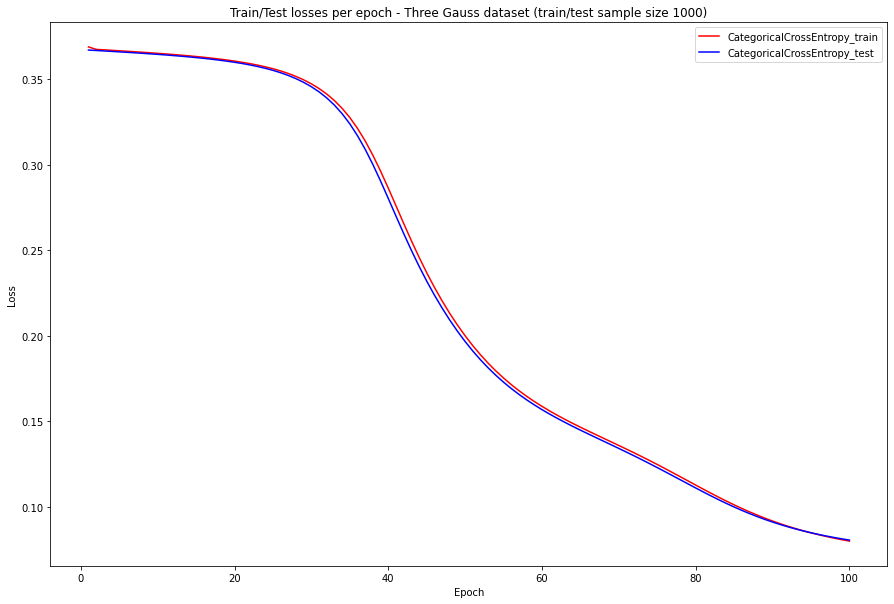

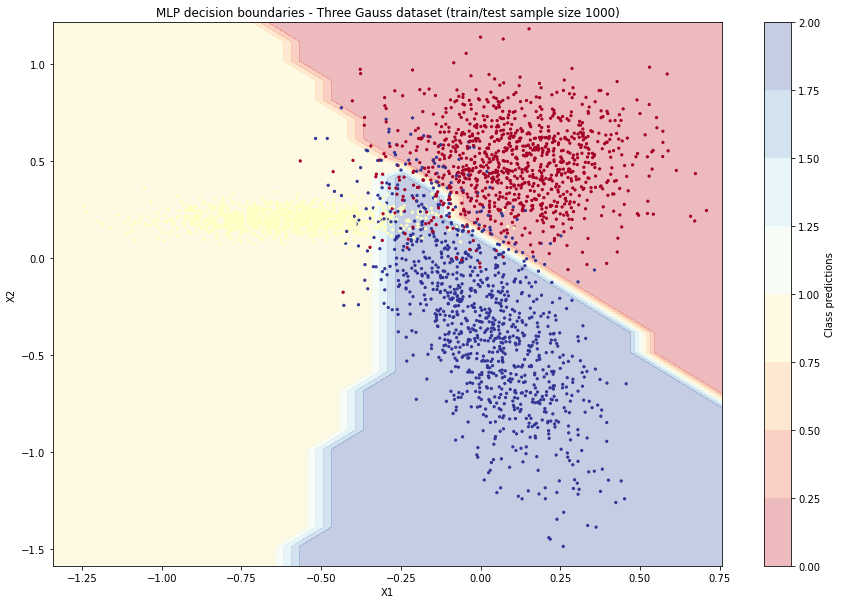

In [3]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{CLF}/data.three_gauss.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.three_gauss.test.{size}.csv", categorical=True)
    layers = [
        Layer(in_size=2, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=3, activ_function=SoftMax),
    ]
    print("=======================================================================================")
    header = f"Three Gauss dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=CategoricalCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=100,
        momentum=0.1,
        learning_rate=0.2,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}")

# Regression

### Activation dataset

Activation dataset (train/test sample size 1000)
Epoch   10 - train loss   6.84 (std:  4.58) - test loss  14.60 (std: 12.91)
Epoch   20 - train loss   2.25 (std:  1.49) - test loss   7.13 (std:  9.13)
Epoch   30 - train loss   0.56 (std:  0.57) - test loss   4.50 (std:  7.38)
Epoch   40 - train loss   0.42 (std:  0.37) - test loss   3.78 (std:  6.39)
Epoch   50 - train loss   0.34 (std:  0.28) - test loss   3.39 (std:  5.86)
Epoch   60 - train loss   0.28 (std:  0.22) - test loss   3.14 (std:  5.49)
Epoch   70 - train loss   0.23 (std:  0.19) - test loss   2.98 (std:  5.21)
Epoch   80 - train loss   0.20 (std:  0.17) - test loss   2.86 (std:  5.00)
Epoch   90 - train loss   0.18 (std:  0.15) - test loss   2.76 (std:  4.82)
Epoch  100 - train loss   0.17 (std:  0.14) - test loss   2.68 (std:  4.68)
Epoch  110 - train loss   0.16 (std:  0.13) - test loss   2.61 (std:  4.56)
Epoch  120 - train loss   0.15 (std:  0.12) - test loss   2.56 (std:  4.45)
Epoch  130 - train loss   0.14 (std:  0

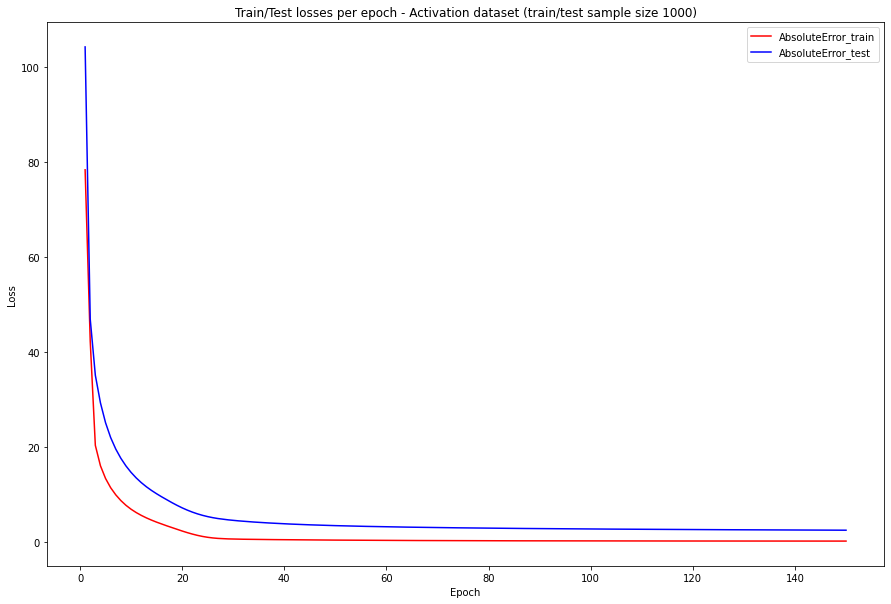

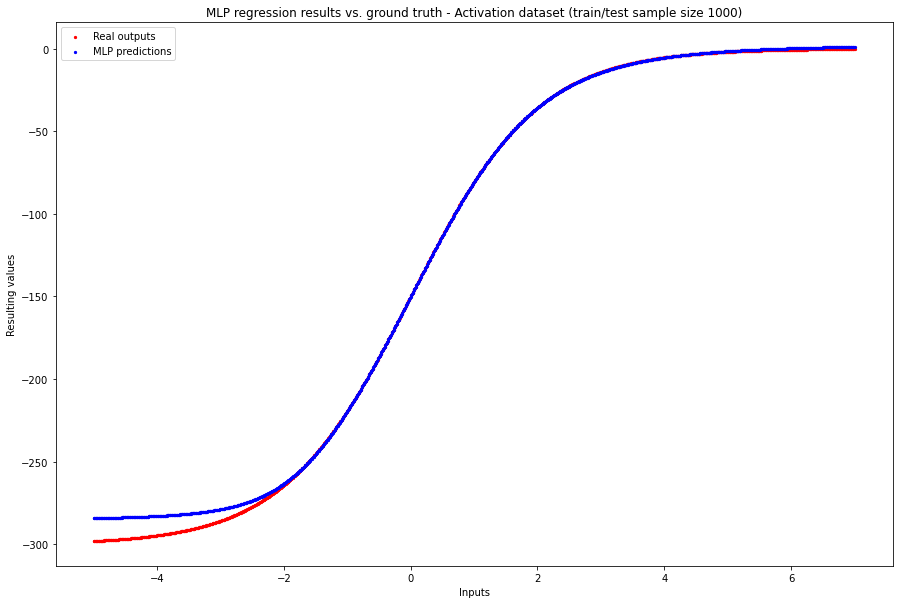

In [4]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{REG}/data.activation.train.{size}.csv")
    X_test, Y_test = read_data(f"{REG}/data.activation.test.{size}.csv")
    layers = [
        Layer(in_size=1, out_size=4, activ_function=Sigmoid),
        Layer(in_size=4, out_size=6, activ_function=Sigmoid),
        Layer(in_size=6, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Activation dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=16,
        epochs=150,
        momentum=0.1,
        learning_rate=0.01,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

### Cube dataset

Cube dataset (train/test sample size 1000)
Epoch   10 - train loss  35.50 (std: 34.30) - test loss 219.73 (std:291.26)
Epoch   20 - train loss  15.87 (std: 22.22) - test loss 188.92 (std:276.68)
Epoch   30 - train loss  12.12 (std: 15.46) - test loss 175.91 (std:264.95)
Epoch   40 - train loss  11.12 (std: 13.57) - test loss 169.93 (std:258.86)
Epoch   50 - train loss  10.76 (std: 12.83) - test loss 166.39 (std:255.11)
Epoch   60 - train loss  10.55 (std: 12.43) - test loss 164.03 (std:252.61)
Epoch   70 - train loss  10.58 (std: 12.04) - test loss 162.77 (std:251.23)
Epoch   80 - train loss  10.57 (std: 11.72) - test loss 161.60 (std:250.00)
Epoch   90 - train loss  10.72 (std: 11.24) - test loss 160.78 (std:249.46)
Epoch  100 - train loss  10.87 (std: 10.77) - test loss 158.73 (std:248.89)


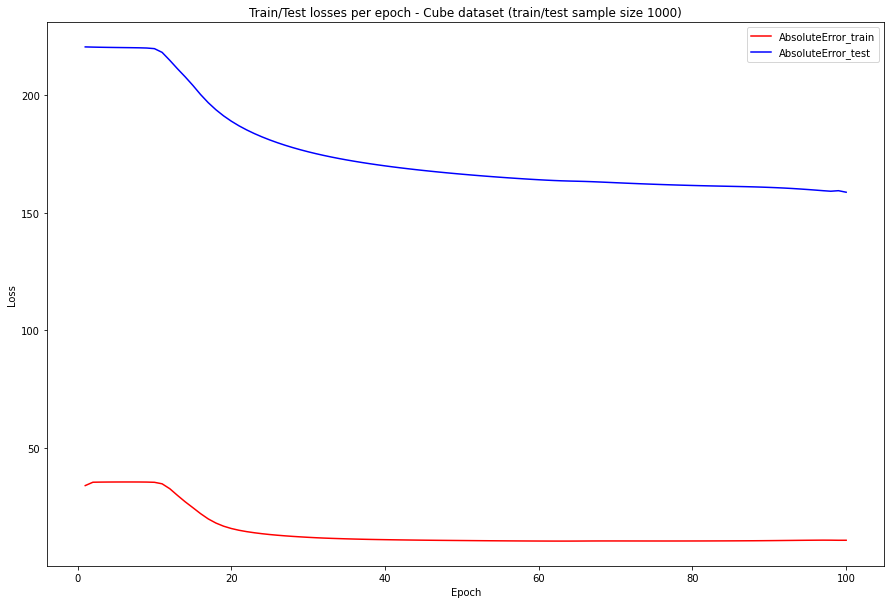

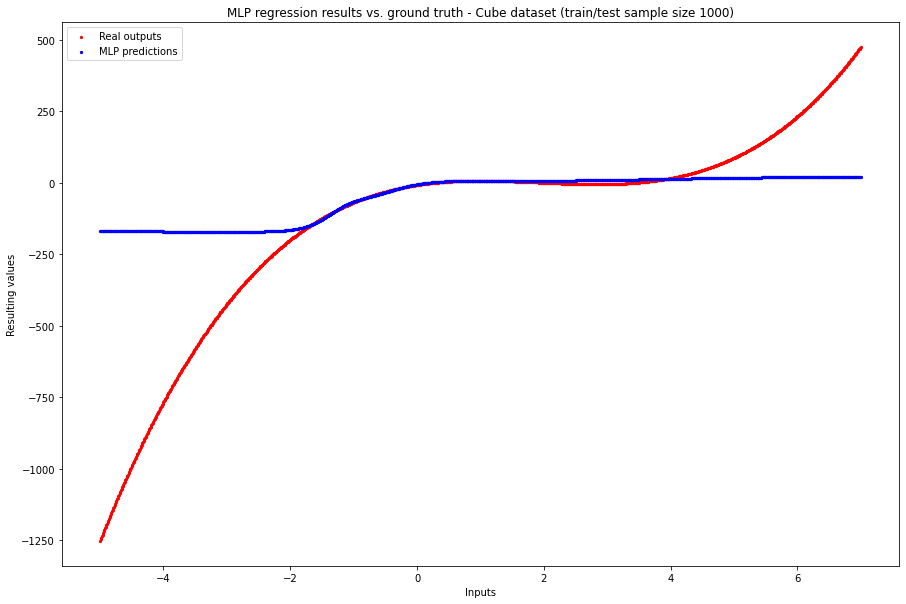

In [5]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{REG}/data.cube.train.{size}.csv")
    X_test, Y_test = read_data(f"{REG}/data.cube.test.{size}.csv")
    layers = [
        Layer(in_size=1, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Cube dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=16,
        epochs=100,
        momentum=0.1,
        learning_rate=0.01,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

### Cube dataset with normalization

Cube dataset (train/test sample size 1000)
Epoch   10 - train loss   0.13 (std:  0.00) - test loss   0.08 (std:  0.07)
Epoch   20 - train loss   0.13 (std:  0.00) - test loss   0.08 (std:  0.06)
Epoch   30 - train loss   0.09 (std:  0.00) - test loss   0.08 (std:  0.06)
Epoch   40 - train loss   0.08 (std:  0.00) - test loss   0.06 (std:  0.04)
Epoch   50 - train loss   0.08 (std:  0.00) - test loss   0.05 (std:  0.04)
Epoch   60 - train loss   0.07 (std:  0.00) - test loss   0.05 (std:  0.04)
Epoch   70 - train loss   0.07 (std:  0.00) - test loss   0.04 (std:  0.04)
Epoch   80 - train loss   0.06 (std:  0.00) - test loss   0.04 (std:  0.04)
Epoch   90 - train loss   0.06 (std:  0.00) - test loss   0.03 (std:  0.04)
Epoch  100 - train loss   0.06 (std:  0.00) - test loss   0.03 (std:  0.04)


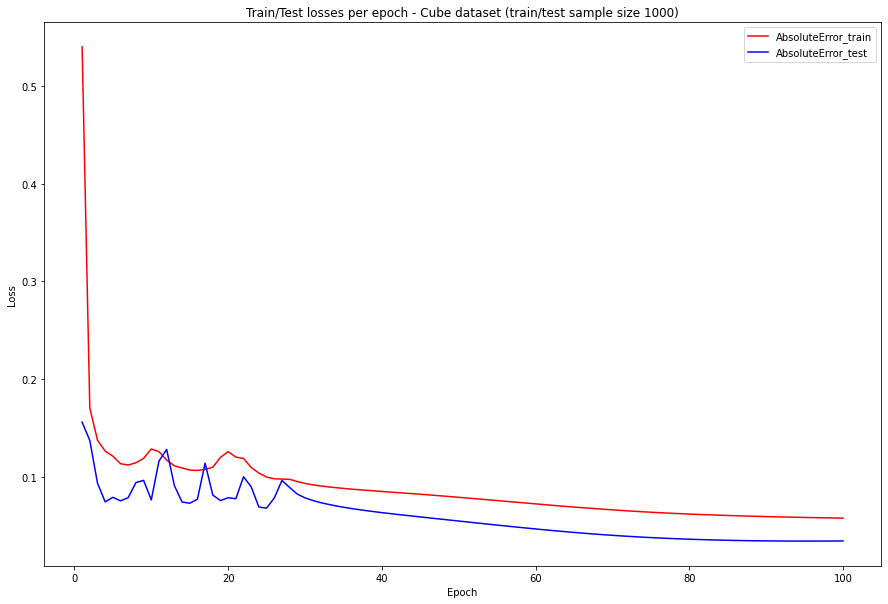

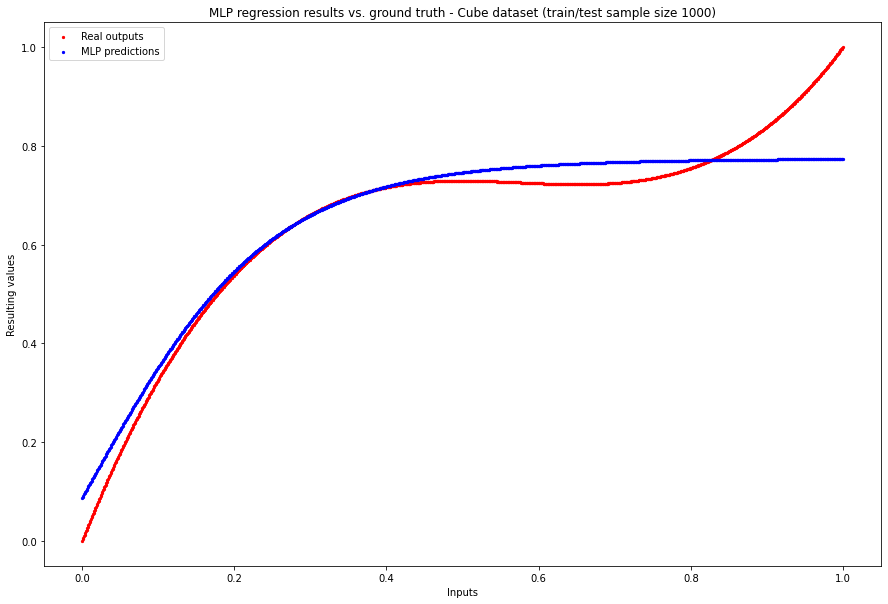

In [6]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{REG}/data.cube.train.{size}.csv", normalize_inputs=True)
    X_test, Y_test = read_data(f"{REG}/data.cube.test.{size}.csv", normalize_inputs=True)
    layers = [
        Layer(in_size=1, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Cube dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=1,
        epochs=100,
        momentum=0.99,
        learning_rate=0.01,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

# Experiments

# Impact of various activation functions on accuracy


## Simple dataset
- Sigmoid activations
- ReLU activations
- TanH activations


Simple dataset (train/test sample size 1000) Activation function in layers except the last one: Sigmoid
Epoch   10 - train loss   0.64 (std:  0.11) - test loss   0.62 (std:  0.12)
Epoch   20 - train loss   0.19 (std:  0.19) - test loss   0.19 (std:  0.20)
Epoch   30 - train loss   0.10 (std:  0.16) - test loss   0.10 (std:  0.17)
Epoch   40 - train loss   0.07 (std:  0.14) - test loss   0.07 (std:  0.15)
Epoch   50 - train loss   0.06 (std:  0.12) - test loss   0.06 (std:  0.14)
Epoch   60 - train loss   0.05 (std:  0.11) - test loss   0.05 (std:  0.13)
Epoch   70 - train loss   0.04 (std:  0.11) - test loss   0.04 (std:  0.12)
Epoch   80 - train loss   0.04 (std:  0.10) - test loss   0.04 (std:  0.12)
Epoch   90 - train loss   0.03 (std:  0.09) - test loss   0.04 (std:  0.11)
Epoch  100 - train loss   0.03 (std:  0.09) - test loss   0.03 (std:  0.11)


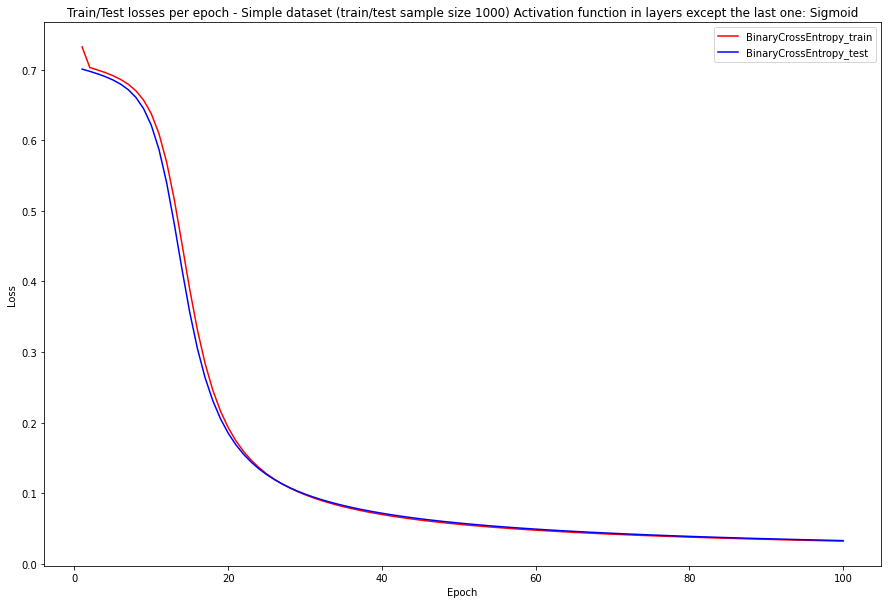

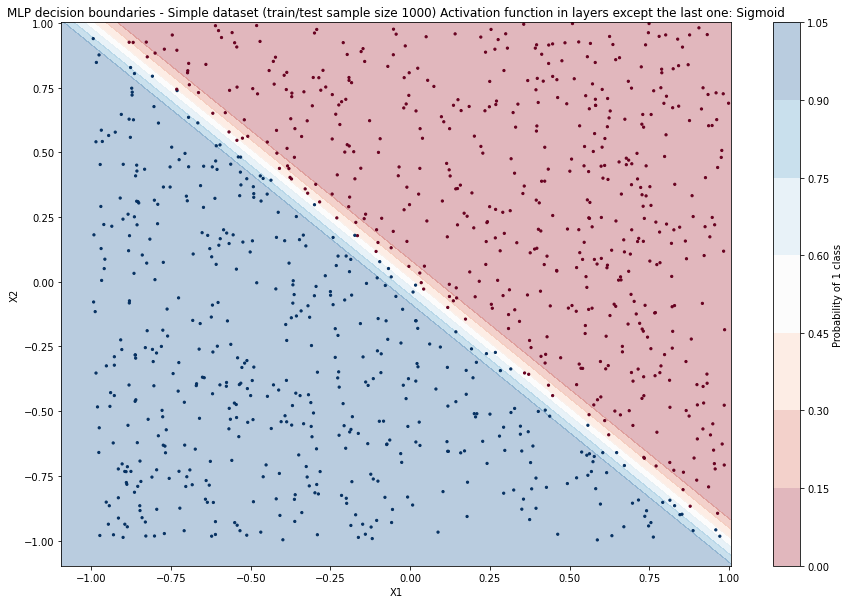

Simple dataset (train/test sample size 1000) Activation function in layers except the last one: ReLU
Epoch   10 - train loss   0.04 (std:  0.14) - test loss   0.12 (std:  0.52)
Epoch   20 - train loss   0.04 (std:  0.12) - test loss   0.09 (std:  0.46)
Epoch   30 - train loss   0.03 (std:  0.11) - test loss   0.07 (std:  0.37)
Epoch   40 - train loss   0.03 (std:  0.10) - test loss   0.02 (std:  0.14)
Epoch   50 - train loss   0.03 (std:  0.09) - test loss   0.02 (std:  0.14)
Epoch   60 - train loss   0.03 (std:  0.09) - test loss   0.03 (std:  0.19)
Epoch   70 - train loss   0.03 (std:  0.10) - test loss   0.04 (std:  0.23)
Epoch   80 - train loss   0.03 (std:  0.09) - test loss   0.03 (std:  0.22)
Epoch   90 - train loss   0.03 (std:  0.09) - test loss   0.03 (std:  0.22)
Epoch  100 - train loss   0.02 (std:  0.08) - test loss   0.03 (std:  0.21)


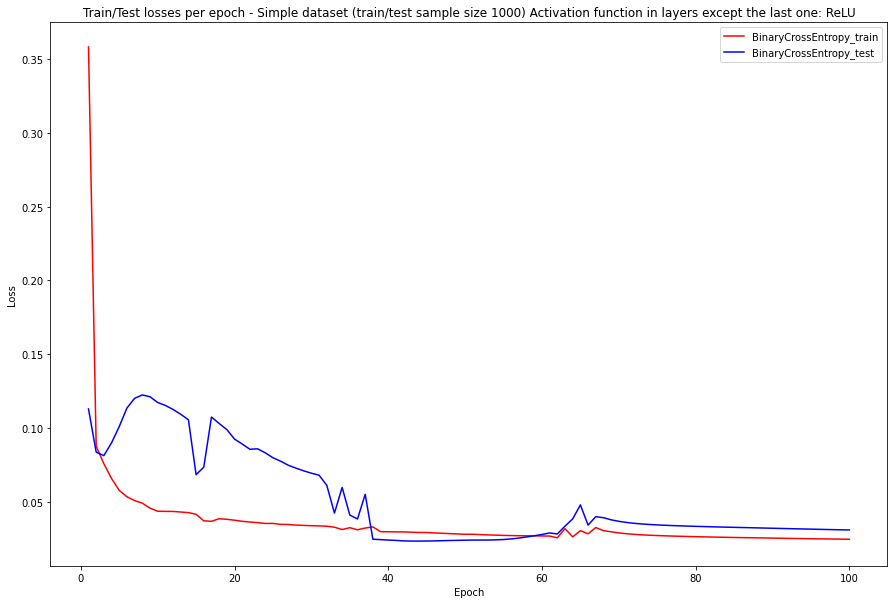

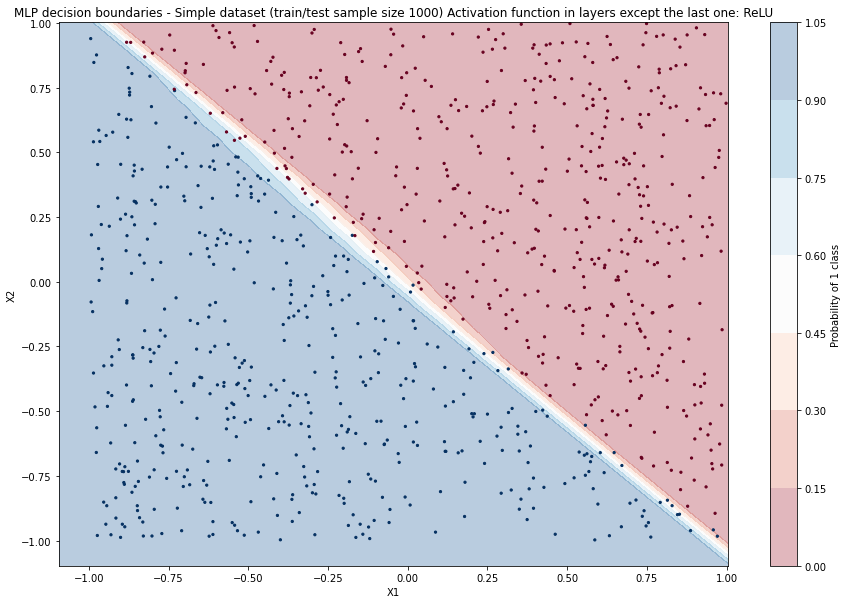

Simple dataset (train/test sample size 1000) Activation function in layers except the last one: TanH
Epoch   10 - train loss   0.03 (std:  0.09) - test loss   0.03 (std:  0.16)
Epoch   20 - train loss   0.03 (std:  0.09) - test loss   0.03 (std:  0.17)
Epoch   30 - train loss   0.02 (std:  0.08) - test loss   0.04 (std:  0.25)
Epoch   40 - train loss   0.03 (std:  0.08) - test loss   0.04 (std:  0.23)
Epoch   50 - train loss   0.03 (std:  0.09) - test loss   0.03 (std:  0.18)
Epoch   60 - train loss   0.03 (std:  0.09) - test loss   0.02 (std:  0.14)
Epoch   70 - train loss   0.03 (std:  0.08) - test loss   0.02 (std:  0.10)
Epoch   80 - train loss   0.02 (std:  0.08) - test loss   0.01 (std:  0.08)
Epoch   90 - train loss   0.02 (std:  0.07) - test loss   0.01 (std:  0.08)
Epoch  100 - train loss   0.02 (std:  0.07) - test loss   0.01 (std:  0.08)


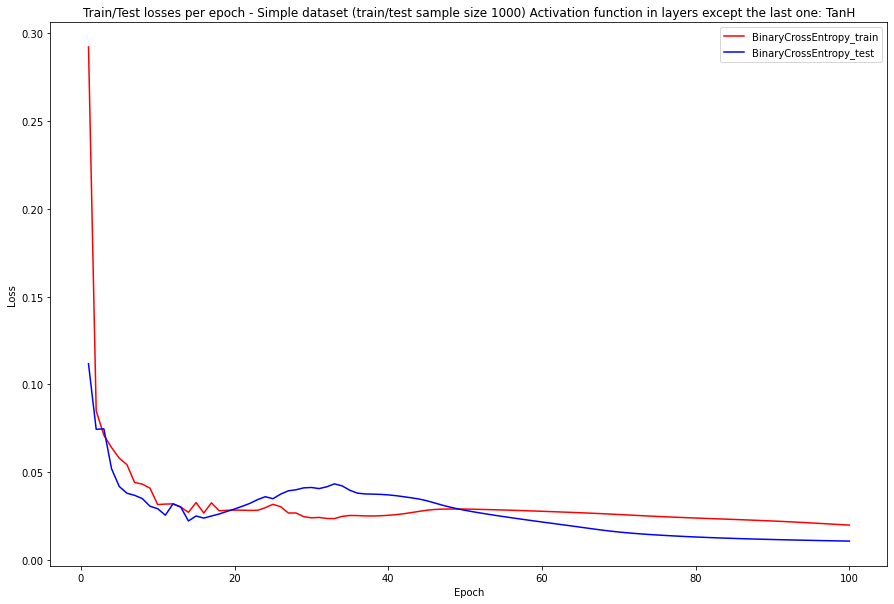

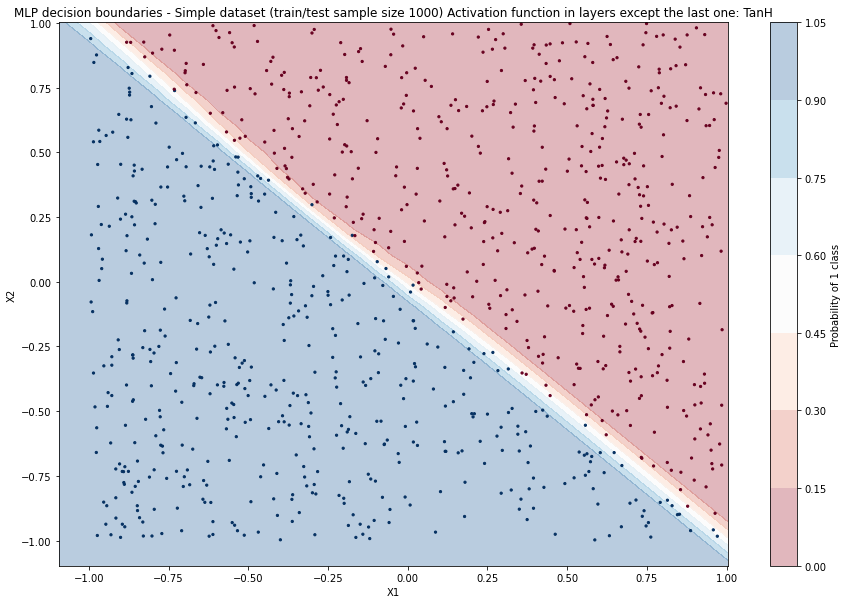

In [7]:
size = DATASET_SIZES[0]
for activation_function in [Sigmoid, ReLU, TanH]:
    X, Y = read_data(f"{CLF}/data.simple.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.simple.test.{size}.csv", categorical=True)
    
    layers = [
        Layer(in_size=2, out_size=5, activ_function=activation_function),
        Layer(in_size=5, out_size=5, activ_function=activation_function),
        Layer(in_size=5, out_size=1, activ_function=Sigmoid),
    ]
    print("=======================================================================================")
    header = f"Simple dataset (train/test sample size {size}) Activation function in layers except the last one: {activation_function.__name__}"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=BinaryCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=100,
        momentum=0.001,
        learning_rate=0.5,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}", binary=True)

## Cube dataset
- Sigmoid activations
- ReLU activations
- TanH activations

Cube dataset (train/test sample size 1000) Activation function in layers except the last one: Sigmoid
Epoch   10 - train loss   0.10 (std:  0.00) - test loss   0.08 (std:  0.07)
Epoch   20 - train loss   0.10 (std:  0.00) - test loss   0.17 (std:  0.09)
Epoch   30 - train loss   0.10 (std:  0.00) - test loss   0.14 (std:  0.09)
Epoch   40 - train loss   0.09 (std:  0.00) - test loss   0.12 (std:  0.08)
Epoch   50 - train loss   0.08 (std:  0.00) - test loss   0.06 (std:  0.04)
Epoch   60 - train loss   0.06 (std:  0.00) - test loss   0.04 (std:  0.05)
Epoch   70 - train loss   0.06 (std:  0.00) - test loss   0.04 (std:  0.04)
Epoch   80 - train loss   0.06 (std:  0.00) - test loss   0.04 (std:  0.04)
Epoch   90 - train loss   0.06 (std:  0.00) - test loss   0.04 (std:  0.04)
Epoch  100 - train loss   0.05 (std:  0.00) - test loss   0.04 (std:  0.04)


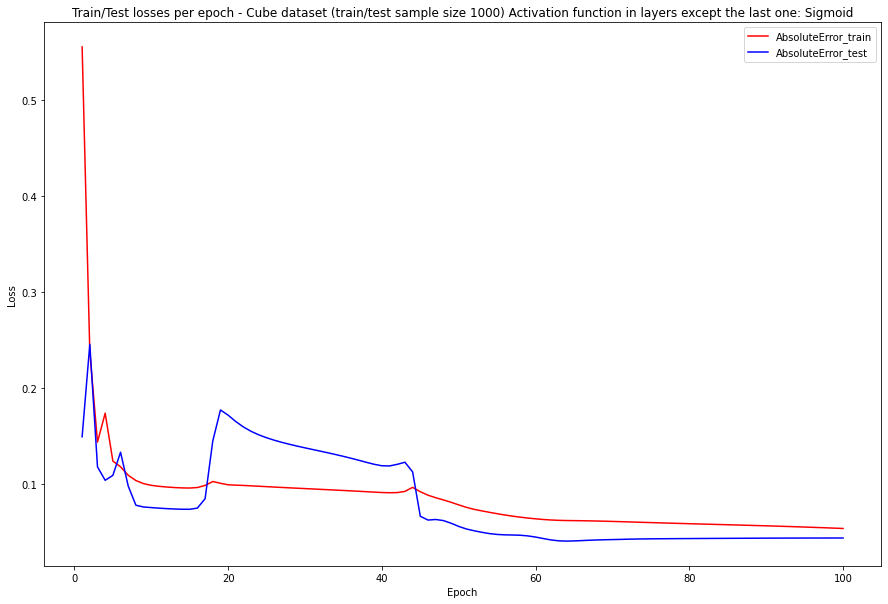

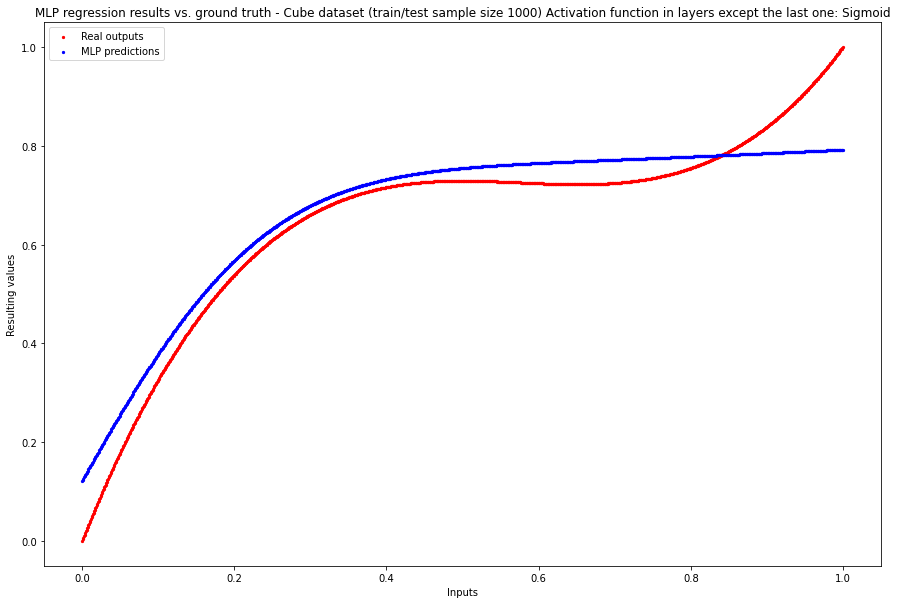

Cube dataset (train/test sample size 1000) Activation function in layers except the last one: ReLU
Epoch   10 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)
Epoch   20 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)
Epoch   30 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)
Epoch   40 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)
Epoch   50 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)
Epoch   60 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)
Epoch   70 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)
Epoch   80 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)
Epoch   90 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)
Epoch  100 - train loss   0.16 (std:  0.00) - test loss   0.27 (std:  0.11)


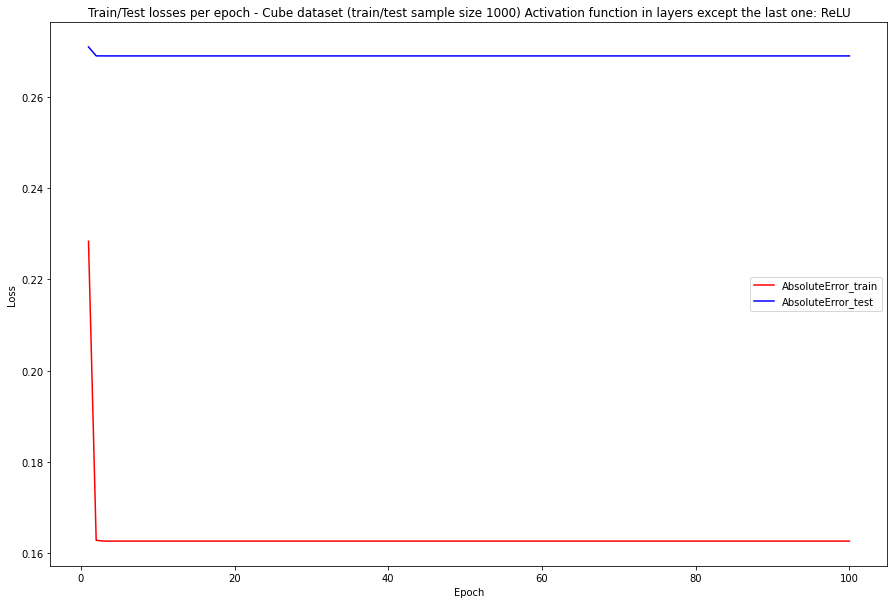

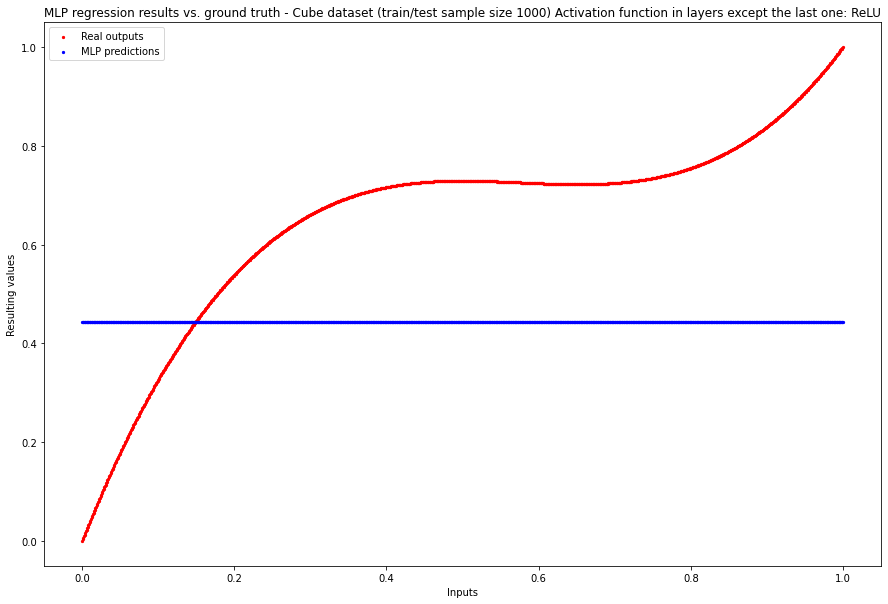

Cube dataset (train/test sample size 1000) Activation function in layers except the last one: TanH
Epoch   10 - train loss   0.27 (std:  0.00) - test loss   0.16 (std:  0.12)
Epoch   20 - train loss   0.28 (std:  0.00) - test loss   0.16 (std:  0.12)
Epoch   30 - train loss   0.27 (std:  0.00) - test loss   0.16 (std:  0.12)
Epoch   40 - train loss   0.15 (std:  0.00) - test loss   0.08 (std:  0.10)
Epoch   50 - train loss   0.10 (std:  0.00) - test loss   0.10 (std:  0.04)
Epoch   60 - train loss   0.09 (std:  0.00) - test loss   0.06 (std:  0.03)
Epoch   70 - train loss   0.09 (std:  0.00) - test loss   0.06 (std:  0.03)
Epoch   80 - train loss   0.09 (std:  0.00) - test loss   0.06 (std:  0.03)
Epoch   90 - train loss   0.09 (std:  0.00) - test loss   0.06 (std:  0.03)
Epoch  100 - train loss   0.09 (std:  0.00) - test loss   0.06 (std:  0.03)


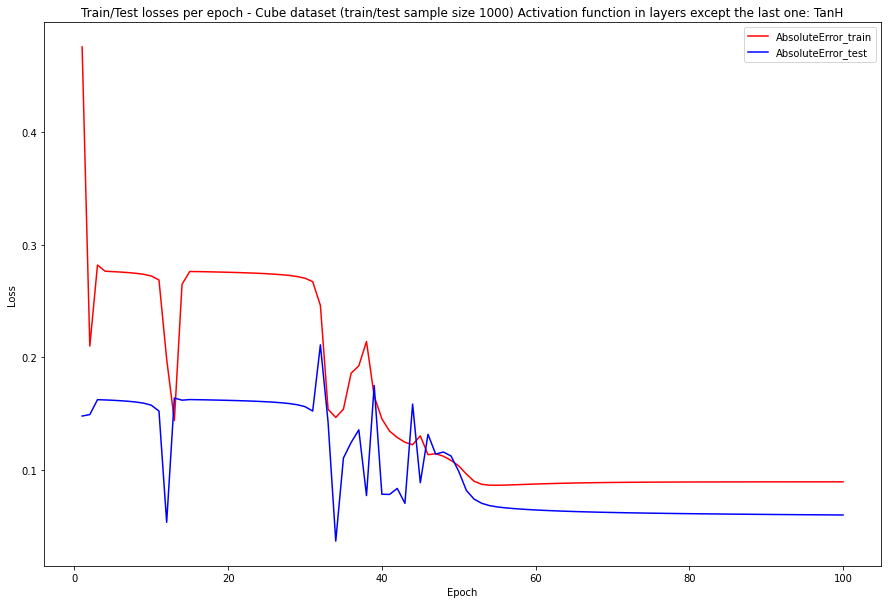

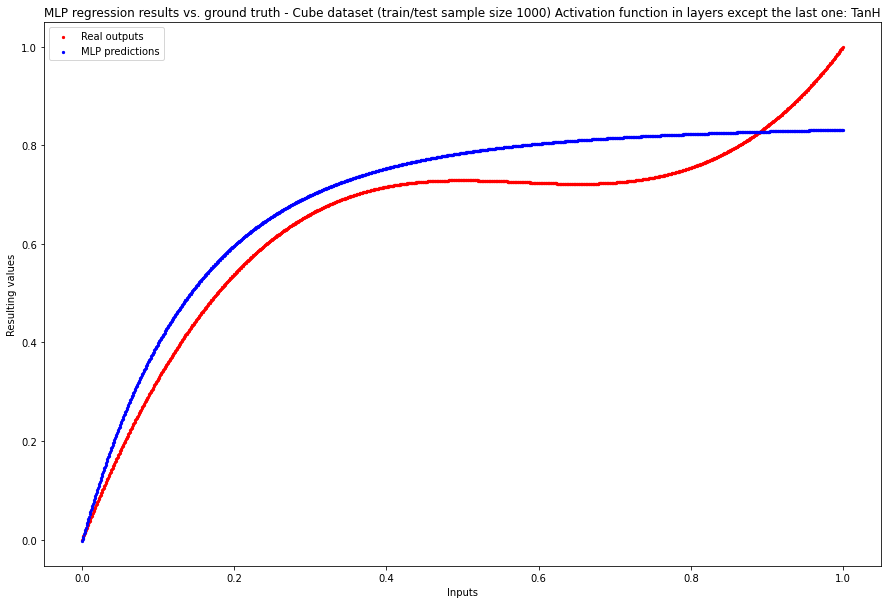

In [8]:
size = DATASET_SIZES[0]
results = []
for activation_function in [Sigmoid, ReLU, TanH]:
    X, Y = read_data(f"{REG}/data.cube.train.{size}.csv", normalize_inputs=True)
    X_test, Y_test = read_data(f"{REG}/data.cube.test.{size}.csv", normalize_inputs=True)
    layers = [
        Layer(in_size=1, out_size=8, activ_function=activation_function),
        Layer(in_size=8, out_size=8, activ_function=activation_function),
        Layer(in_size=8, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Cube dataset (train/test sample size {size}) Activation function in layers except the last one: {activation_function.__name__}"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=1,
        epochs=100,
        momentum=0.99,
        learning_rate=0.01,
    )

    stats = m.train(X,Y, X_test, Y_test)
    plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

# Impact of number of hidden layers and their size on accuracy

## Three gauss dataset:
- hidden layer numbers: 1, 3, 5
- hidden layer sizes: 3, 5, 10

In [10]:
size = DATASET_SIZES[0]
hidden_layers = [1, 3, 5]
hidden_layer_sizes = [3, 5, 10]
result_dict = {n: [] for n in hidden_layers}

for hidden_layer_number in hidden_layers:
    for hidden_layer_size in hidden_layer_sizes:
        X, Y = read_data(f"{CLF}/data.three_gauss.train.{size}.csv", categorical=True)
        X_test, Y_test = read_data(f"{CLF}/data.three_gauss.test.{size}.csv", categorical=True)
        
        layers = [
            Layer(in_size=2, out_size=hidden_layer_size, activ_function=Sigmoid),
            *[Layer(in_size=hidden_layer_size, out_size=hidden_layer_size, activ_function=Sigmoid) for _ in range(hidden_layer_number)],
            Layer(in_size=hidden_layer_size, out_size=3, activ_function=SoftMax),
        ]
        
        print("=======================================================================================")
        header = f"Three Gauss dataset (train/test sample size {size}) - {hidden_layer_number} hidden layers, hidden layer size {hidden_layer_size}"
        print(header)
        print("=======================================================================================")
        m = MLP(
            layers=layers,
            loss=CategoricalCrossEntropy,
            bias=True,
            batch_size=16,
            epochs=100,
            momentum=0.1,
            learning_rate=0.2,
        )
        stats = m.train(X,Y, X_test, Y_test)

Three Gauss dataset (train/test sample size 1000) - 1 hidden layers, hidden layer size 3
Epoch   10 - train loss   0.36 (std:  0.52) - test loss   0.36 (std:  0.51)
Epoch   20 - train loss   0.36 (std:  0.51) - test loss   0.35 (std:  0.50)
Epoch   30 - train loss   0.33 (std:  0.48) - test loss   0.33 (std:  0.47)
Epoch   40 - train loss   0.26 (std:  0.40) - test loss   0.25 (std:  0.40)
Epoch   50 - train loss   0.20 (std:  0.33) - test loss   0.19 (std:  0.33)
Epoch   60 - train loss   0.16 (std:  0.31) - test loss   0.16 (std:  0.32)
Epoch   70 - train loss   0.15 (std:  0.31) - test loss   0.15 (std:  0.33)
Epoch   80 - train loss   0.14 (std:  0.32) - test loss   0.14 (std:  0.35)
Epoch   90 - train loss   0.14 (std:  0.33) - test loss   0.14 (std:  0.36)
Epoch  100 - train loss   0.14 (std:  0.33) - test loss   0.14 (std:  0.38)
Three Gauss dataset (train/test sample size 1000) - 1 hidden layers, hidden layer size 5
Epoch   10 - train loss   0.37 (std:  0.52) - test loss   0.37

## Activation dataset
- hidden layer numbers: 1, 3, 5
- hidden layer sizes: 3, 5, 10

In [11]:
size = DATASET_SIZES[0]
hidden_layers = [1, 3, 5]
hidden_layer_sizes = [3, 5, 10]
result_dict = {n: [] for n in hidden_layers}

for hidden_layer_number in hidden_layers:
    for hidden_layer_size in hidden_layer_sizes:
        X, Y = read_data(f"{REG}/data.activation.train.{size}.csv")
        X_test, Y_test = read_data(f"{REG}/data.activation.test.{size}.csv")
        
        layers = [
            Layer(in_size=1, out_size=hidden_layer_size, activ_function=Sigmoid),
            *[Layer(in_size=hidden_layer_size, out_size=hidden_layer_size, activ_function=Sigmoid) for _ in range(hidden_layer_number)],
            Layer(in_size=hidden_layer_size, out_size=1, activ_function=Linear),
        ]
        
        print("=======================================================================================")
        header = f"Activation dataset (train/test sample size {size}) - {hidden_layer_number} hidden layers, hidden layer size {hidden_layer_size}"
        print(header)
        print("=======================================================================================")
        m = MLP(
            layers=layers,
            loss=AbsoluteError,
            bias=True,
            batch_size=16,
            epochs=100,
            momentum=0.1,
            learning_rate=0.01,
        )
        stats = m.train(X,Y, X_test, Y_test)

Activation dataset (train/test sample size 1000) - 1 hidden layers, hidden layer size 3
Epoch   10 - train loss  78.81 (std: 40.44) - test loss 109.81 (std: 59.94)
Epoch   20 - train loss  78.75 (std: 40.37) - test loss 109.68 (std: 59.81)
Epoch   30 - train loss  23.47 (std: 16.94) - test loss  40.87 (std: 30.72)
Epoch   40 - train loss   6.87 (std:  5.36) - test loss  16.92 (std: 17.12)
Epoch   50 - train loss   2.32 (std:  2.32) - test loss  10.53 (std: 13.58)
Epoch   60 - train loss   1.58 (std:  1.38) - test loss   8.74 (std: 11.82)
Epoch   70 - train loss   1.43 (std:  1.06) - test loss   8.59 (std: 10.44)
Epoch   80 - train loss   1.16 (std:  0.84) - test loss   7.51 (std:  9.97)
Epoch   90 - train loss   0.94 (std:  0.68) - test loss   6.68 (std:  9.62)
Epoch  100 - train loss   0.76 (std:  0.56) - test loss   6.04 (std:  9.29)
Activation dataset (train/test sample size 1000) - 1 hidden layers, hidden layer size 5
Epoch   10 - train loss  78.91 (std: 41.07) - test loss 110.33 (